In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data=pd.read_csv('gld_price_data.csv')
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [43]:
data.shape

(2290, 6)

In [44]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [45]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [46]:
data.duplicated().sum()

0

In [47]:
data.rename(columns={'EUR/USD': 'EUR_USD'}, inplace=True)

In [48]:
data1=data.copy()
data1=data1.drop('Date',axis=1)

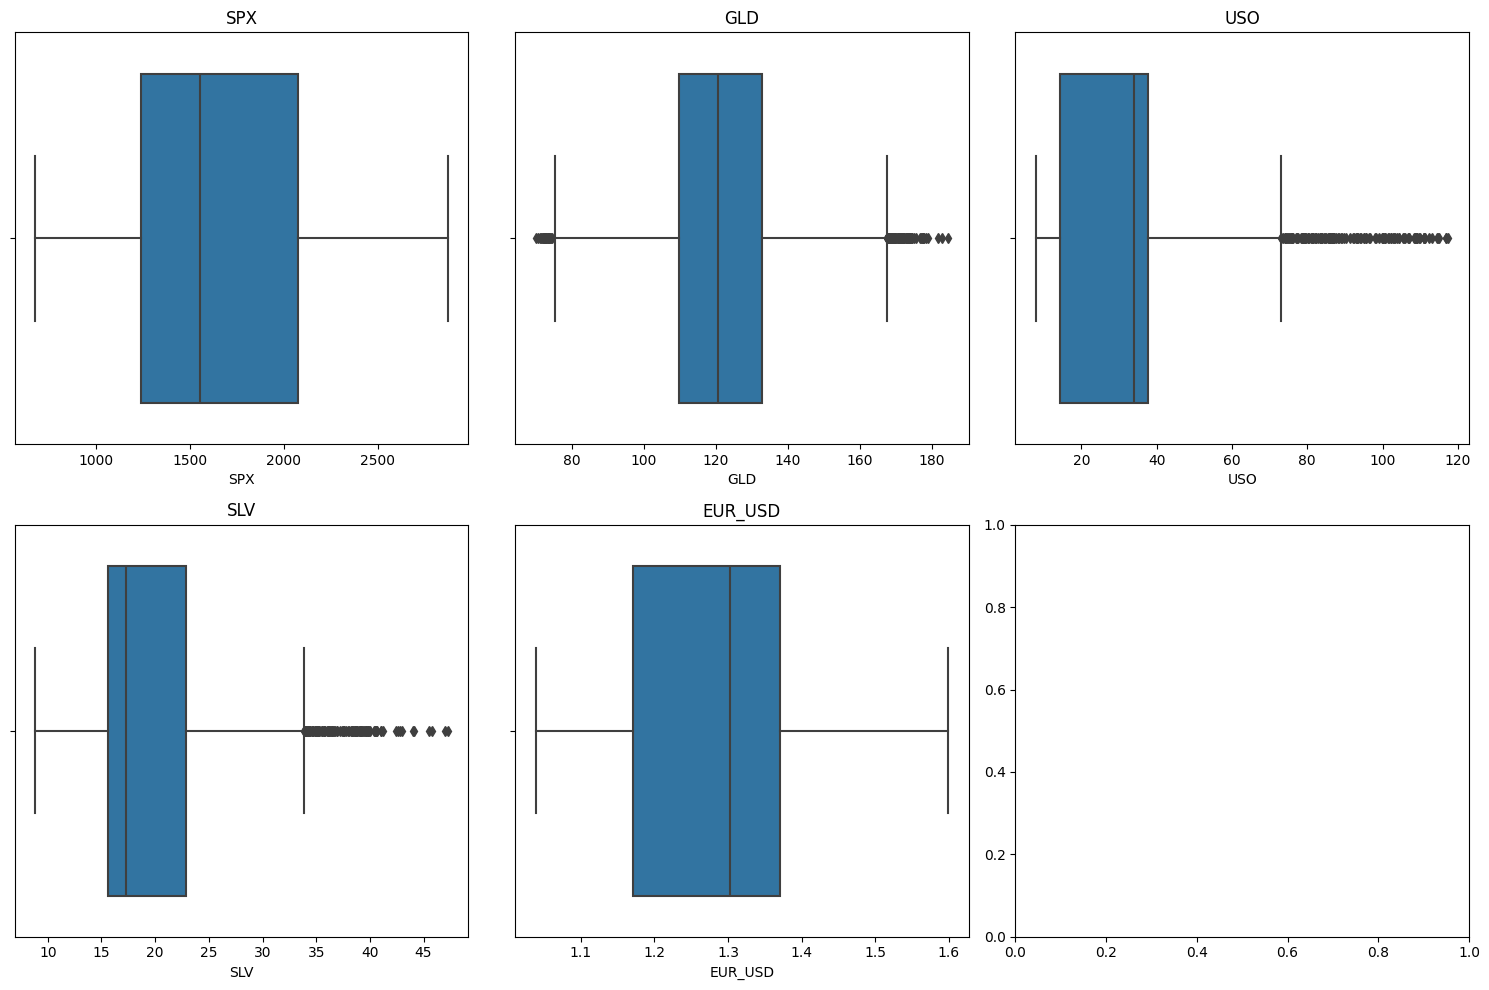

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, feature in enumerate(data1.columns):
    sns.boxplot(x=data1[feature], ax=axes[i])
    axes[i].set_title(feature)
plt.tight_layout()
plt.show()

In [50]:
for col in data1:
    print(data[col].quantile(.25))

1239.87496925
109.72500025
14.38
15.57
1.171313


In [55]:
Q1 = np.percentile(data1['GLD'], 25, interpolation='midpoint')
Q3 = np.percentile(data1['GLD'], 75, interpolation='midpoint')
IQR = Q3 - Q1
UpperLimit = Q3 + 1.5 * IQR
LowerLimit = Q1 - 1.5 * IQR
OutlierList = []
for i in range(data1['GLD'].shape[0]):
    if data1['GLD'][i] >= UpperLimit or data1['GLD'][i] <= LowerLimit:
        OutlierList.append(i)
data1 = data1.drop(OutlierList, axis=0)
data1 =data1.reset_index()
data1 = data1.drop('index', axis=1)

In [57]:
Q1 = np.percentile(data1['USO'], 25, interpolation='midpoint')
Q3 = np.percentile(data1['USO'], 75, interpolation='midpoint')
IQR = Q3 - Q1
UpperLimit = Q3 + 1.5 * IQR
LowerLimit = Q1 - 1.5 * IQR
OutlierList = []
for i in range(data1['USO'].shape[0]):
    if data1['USO'][i] >= UpperLimit or data1['USO'][i] <= LowerLimit:
        OutlierList.append(i)
data1 = data1.drop(OutlierList, axis=0)
data1 =data1.reset_index()
data1 = data1.drop('index', axis=1)

In [58]:
Q1 = np.percentile(data1['SLV'], 25, interpolation='midpoint')
Q3 = np.percentile(data1['SLV'], 75, interpolation='midpoint')
IQR = Q3 - Q1
UpperLimit = Q3 + 1.5 * IQR
LowerLimit = Q1 - 1.5 * IQR
OutlierList = []
for i in range(data1['SLV'].shape[0]):
    if data1['SLV'][i] >= UpperLimit or data1['SLV'][i] <= LowerLimit:
        OutlierList.append(i)
data1 = data1.drop(OutlierList, axis=0)
data1 =data1.reset_index()
data1 = data1.drop('index', axis=1)

In [60]:
correlation = data1.corr()
correlation

,SPX,GLD,USO,SLV,EUR_USD
SPX,1.000000,0.512002,-0.758836,-0.114735,-0.664565
GLD,0.512002,1.000000,-0.117915,0.707940,-0.105848
USO,-0.758836,-0.117915,1.000000,0.499433,0.893108
SLV,-0.114735,0.707940,0.499433,1.000000,0.423132
EUR_USD,-0.664565,-0.105848,0.893108,0.423132,1.000000


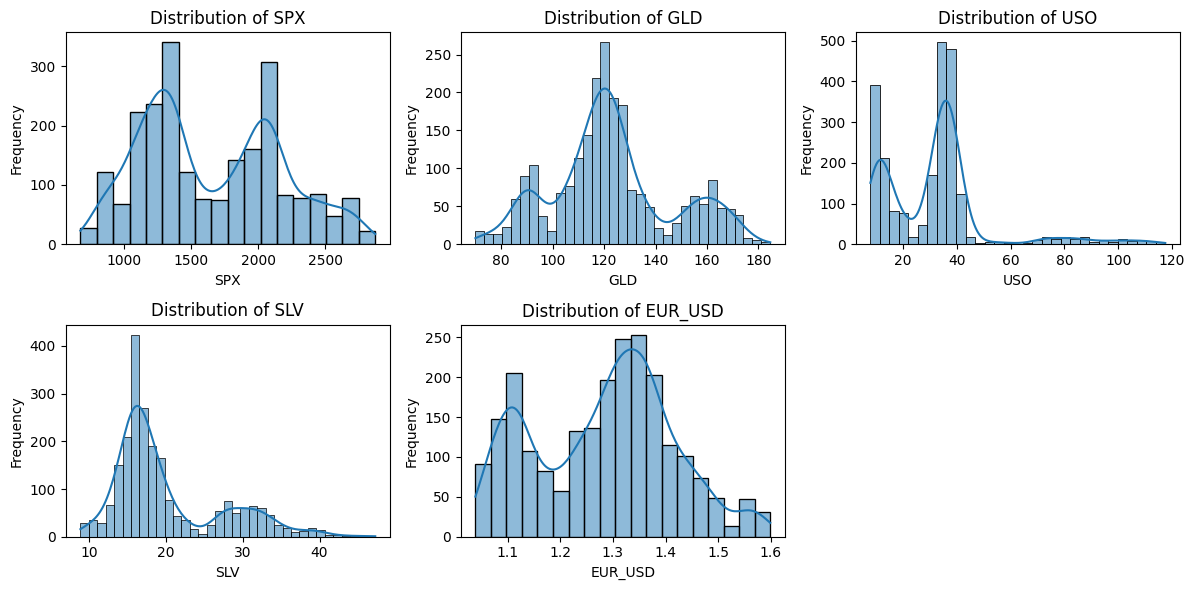

In [61]:
plt.figure(figsize=(12, 6))

# Create a subplot for each column
for i, col in enumerate(data1.columns):
    plt.subplot(2, 3, i + 1)  # Adjust the subplot layout as needed
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = data1.drop('GLD', axis=1)
y = data1['GLD']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [64]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [65]:
from sklearn.linear_model import LinearRegression;
gs=GridSearchCV(LinearRegression(), {},cv=cv, return_train_score=False);
gs.fit(X, y);
print(gs.best_score_)
print(gs.best_params_)

0.8698137536696182
{}


In [79]:
from sklearn.model_selection import GridSearchCV;
from sklearn.tree import DecisionTreeRegressor;
gs = GridSearchCV(DecisionTreeRegressor(),{'criterion': ['mse','friedman_mse'],
        'splitter': ['best', 'random']},cv=cv,return_train_score=False)
gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

0.9702880454120079
{'criterion': 'friedman_mse', 'splitter': 'best'}


C:\Users\TUSHAR TIRTHA SARMAH\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\TUSHAR TIRTHA SARMAH\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TUSHAR TIRTHA SARMAH\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\TUSHAR TIRTHA SARMAH\AppData\Roaming\Python\Python311\site-packages

In [77]:
from sklearn.ensemble import RandomForestRegressor

gs = GridSearchCV(
    RandomForestRegressor(),
    {
        'n_estimators': [10, 50, 100],
        'criterion': ['mae', 'poisson', 'friedman_mse'],
        'max_depth': [None, 10, 20],
    },
    cv=cv,
    return_train_score=False
)

gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

C:\Users\TUSHAR TIRTHA SARMAH\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\TUSHAR TIRTHA SARMAH\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TUSHAR TIRTHA SARMAH\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\TUSHAR TIRTHA SARMAH\AppData\Roaming\Python\Python311\site-package

0.9833995464047222
{'criterion': 'friedman_mse', 'max_depth': None, 'n_estimators': 100}
